In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
from utils import *

In [76]:
%load_ext autoreload
%autoreload 2
import rbm_qst

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
n_vis = 10  # Number of visible neurons.
n_hid = 9  # Number of hidden neurons.

ratio = n_hid / n_vis  # Expressive power.

print(ratio)

0.9


# Dataset generation for simplest W state

In [148]:
def dataset_w(n_vis, n_samples, hist=False):
    sparsed_states = np.eye(n_vis)
    random_indices = np.random.randint(0, n_vis, n_samples)
    dataset = []
    for i in random_indices:
        dataset.append(sparsed_states[i])

    dataset = np.array(dataset)
    if hist:
        plt.hist(random_indices, bins=n_vis)
        plt.show()
    return dataset

def ideal_w(n_vis):
    sparsed_states = np.eye(n_vis)
    return sparsed_states


def fidelity_RBM(trained_RBM, ideal_state, num_samples=1000, num_steps=10):
    sampled_from_RBM = np.array([trained_RBM.daydream(num_steps)[-1] for _ in range(num_samples)])
    sampled_from_RBM = into_dict(sampled_from_RBM)

    return fidelity_dicts(ideal_state, sampled_from_RBM)

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


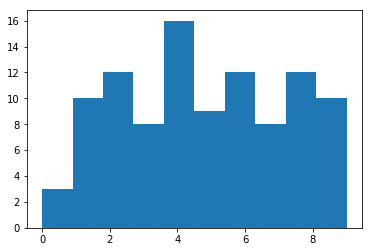

In [13]:
num_samples = 100

dataset = dataset_w(n_vis, num_samples, hist=True)
print(dataset[0])

# Calculating gradient

In [14]:
params = {
    "lambda": {
        "W": np.random.random((n_hid, n_vis)),  # Weights matrix.
        "b": np.random.random(n_vis),  # Biases to visible neurons.
        "c": np.random.random(n_hid)  # Biases to hidden neurons.
    },

    "mu": {
        "W": np.random.random((n_hid, n_vis)),
        "b": np.random.random(n_vis),
        "c": np.random.random(n_hid)
    }
}

grad_lambda_ksi(dataset, params)

{'W': array([[ 0.02360267,  0.07812689,  0.08722375,  0.06073719,  0.11125865,
          0.06548993,  0.0969359 ,  0.05662081,  0.07464794,  0.07460702],
        [ 0.02043615,  0.06660366,  0.08451926,  0.04806098,  0.10572023,
          0.07049079,  0.0944728 ,  0.05670343,  0.08420845,  0.06567456],
        [ 0.02268736,  0.08237608,  0.09382355,  0.06774127,  0.1337352 ,
          0.07362732,  0.09153533,  0.06602224,  0.10009176,  0.08447846],
        [ 0.0237199 ,  0.07809762,  0.08844976,  0.06878417,  0.13456856,
          0.07551995,  0.10227437,  0.06630016,  0.09573524,  0.08121051],
        [ 0.01966033,  0.06971802,  0.08211714,  0.05069295,  0.12368267,
          0.05979292,  0.08918041,  0.05571245,  0.07562706,  0.06557922],
        [ 0.02274522,  0.08532021,  0.10279286,  0.06367703,  0.11691467,
          0.06602714,  0.0859291 ,  0.05930268,  0.09502112,  0.08091809],
        [ 0.02232036,  0.07621587,  0.08092481,  0.06014893,  0.10982343,
          0.07296763,  0.08

# RBM Training...

In [107]:
n_vis = 5  # Number of visible neurons.
n_hid = 5  # Number of hidden neurons.

params = {
    "lambda": {
        "W": np.random.random((n_hid, n_vis)),
        "b": np.random.random(n_vis),
        "c": np.random.random(n_hid)
    },

    "mu": {
        "W": np.random.random((n_hid, n_vis)),
        "b": np.random.random(n_vis),
        "c": np.random.random(n_hid)
    }
}

r = RBM(n_vis, n_hid, params, debug_print=True)

In [380]:
r.train(dataset, max_epochs=1000, learning_rate=0.01)

# Research...

In [108]:
num_units = 80
r = rbm_qst.RBM(num_units, num_units)

In [155]:
r.train(dataset, dataset, max_epochs=1000, overlap_each=40, onum_samples=1000,
        onum_steps=10, learning_rate=0.2, overlap=False, debug=True)

Calculating overlap:

In [111]:
fidelity_RBM(r, into_dict(dataset))

0

## Use classical RBM

In [120]:
import rbm_classic

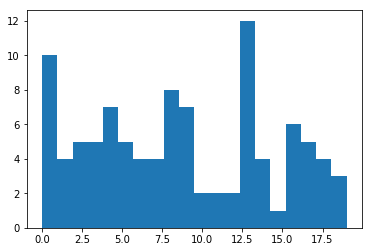

In [144]:
num_units = 20
r_cl = rbm_classic.RBM(num_units, num_units)  # RBM from rbm_classic.py
dataset = dataset_w(num_units, 100, hist=True)

In [154]:
r_cl.train(dataset, max_epochs=5000, learning_rate=0.5)

Calculating overlap:

In [146]:
fidelity_RBM(r_cl, into_dict(ideal_w(num_units)))

0.63013445759732245

In [147]:
fidelity_RBM(r_cl, into_dict(dataset))

0.664845880841063

# Plot Fig.1 b

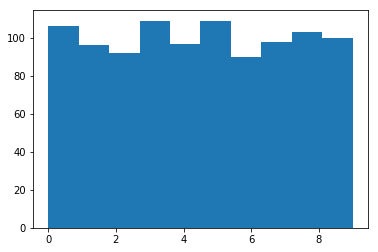

In [180]:
dataset = dataset_w(num_units, 1000, hist=True)

In [175]:
import tqdm

num_units = 10
fidelities = []
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = dataset_w(num_units, N_s)
    
    r_cl = rbm_classic.RBM(num_units, num_units, debug_print=False)
    r_cl.train(dataset, max_epochs=10000, learning_rate=0.3)

    fidelities.append(fidelity_RBM(r_cl, into_dict(ideal_w(num_units))))

overlaps = list(map(lambda x: np.sqrt(x), fidelities))

100%|██████████| 4/4 [00:23<00:00,  5.98s/it]


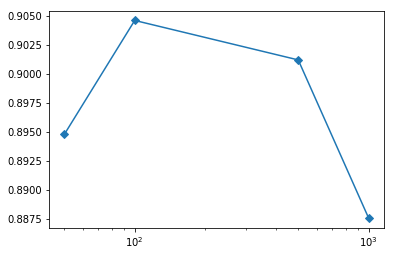

In [176]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.show()

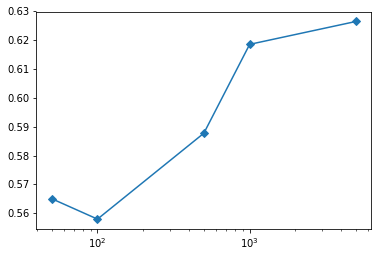

In [160]:
plt.semilogx(N_samples, fidelities, '.-', marker='D')
plt.show()

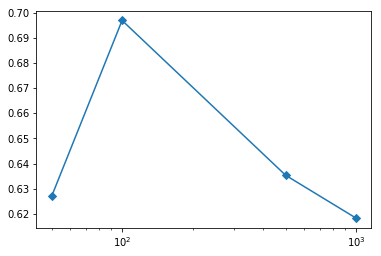

In [150]:
plt.semilogx(N_samples, fidelities, '.-', marker='D')
plt.show()